In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from mosaMLP import MLP
from easydict import EasyDict as edict

In [2]:
digits = load_digits()
X = digits.data
Y = digits.target
Y = np.eye(10)[Y]  # one hot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1257, 64), (1257, 10), (540, 64), (540, 10))

In [3]:
MLPstructure = edict(
    D_in = X_train.shape[1],
    H1 = 128,
    H2 = 32,
    D_out = Y_train.shape[1],
    η = 0.001,
)

model = MLP(MLPstructure)
train_output = model.fit(X_train, Y_train, X_test, Y_test, epochs=200)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [03:30<00:00,  1.05s/it]

train completed!


In [4]:
import cv2

image = cv2.imread("input/test4.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.astype(np.float32)

x = image.reshape(-1, 1)
y_pred = model.predict(x)
print(np.argmax(y_pred))

1


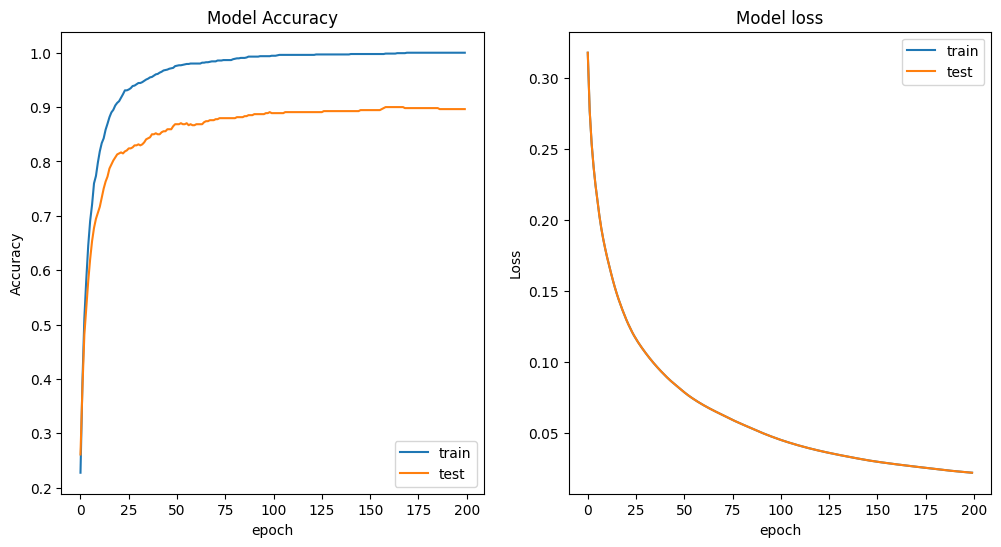

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(model.accs_train)
ax1.plot(model.accs_test)
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(['train','test'])

ax2.plot(model.Losss_train)
ax2.plot(model.Losss_train)
ax2.set_title("Model loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
ax2.legend(['train','test'])

plt.show()

In [5]:
image

array([[ 0.,  0.,  0., 14., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 15.,  0.,  0.,  0.]], dtype=float32)